<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

In [1]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
crop_data=pd.read_csv("../datasets/crop_production.csv")
# crop_data = crop_data.set_index(['State', 'Crop','Area','Production','Yield'], drop=True)
#crop_data.drop('Unnamed: 0', axis=1, inplace=True)
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
crop_data.shape

#rows X columns

(246091, 7)

In [4]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [5]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [6]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
# Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [8]:
#checking
crop_data.isnull().values.any()


False

In [9]:
# Displaying State Names present in the dataset
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [10]:
# Displaying State Names present in the dataset
crop_data.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [11]:
# Adding a new column Yield which indicates Production per unit Area. 

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

C:\Users\kisho\AppData\Local\Temp\ipykernel_16148\416474790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [12]:
# Dropping unnecessary columns

crop_data = crop_data.drop(['District_Name','Crop_Year','Season'], axis = 1)
crop_data.head(10)

,State_Name,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,Tapioca,40.0,169.0,4.225000


In [13]:
crop_data.to_csv('../datasets/crop_yield_data1.csv')

In [14]:
crop_data.corr()

C:\Users\kisho\AppData\Local\Temp\ipykernel_16148\2551321222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop_data.corr()


,Area,Production,Yield
Area,1.000000,0.040587,0.001822
Production,0.040587,1.000000,0.330961
Yield,0.001822,0.330961,1.000000


C:\Users\kisho\AppData\Local\Temp\ipykernel_16148\2621403898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_data.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

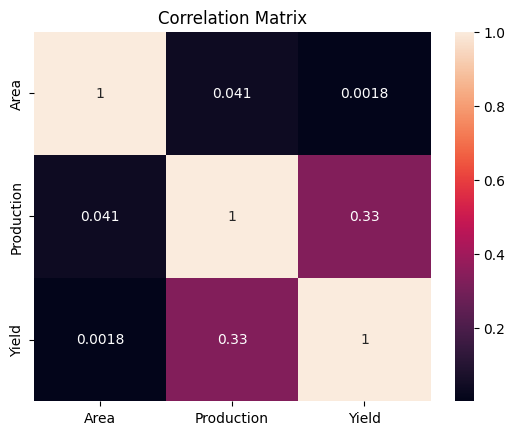

In [15]:
sns.heatmap(crop_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [16]:
dummy = pd.get_dummies(crop_data)
dummy


,Area,Production,Yield,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.594896,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,3.147059,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,3.642045,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,0.229167,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,306.0,801.0,2.617647,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,627.0,463.0,0.738437,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,324.0,16250.0,50.154321,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,279151.0,597899.0,2.141848,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dummy.to_csv('../data-dummy/crop_yield_data.csv')

<b><i> Splitting dataset into train and test dataset </i></b>

In [18]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Yield"], axis=1)
y = dummy["Yield"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (181770, 159)
x_test : (60591, 159)
y_train : (181770,)
y_test : (60591,)


In [19]:
print(x_train)
print(y_train)

          Area  Production  State_Name_Andaman and Nicobar Islands  \
201072    16.0        11.0                                       0   
191897  5400.0      2000.0                                       0   
43814   2968.0      2555.0                                       0   
32815    211.0       175.0                                       0   
62249   1700.0      1400.0                                       0   
...        ...         ...                                     ...   
236131   207.0       139.0                                       0   
127145    39.0        44.0                                       0   
20536     43.0        27.0                                       0   
18709   2489.0      4779.0                                       0   
35767     67.0        81.0                                       0   

        State_Name_Andhra Pradesh  State_Name_Arunachal Pradesh  \
201072                          0                             0   
191897                   

<b><h3> Random Forest Algorithm </h3></b>

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([0.4773112 , 0.72275313, 2.89772618, ..., 0.7046683 , 0.73084601,
       1.        ])

In [21]:
model.score(x_test,y_test)

0.9756981322099794

In [22]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9756981322099794


C:\Users\kisho\AppData\Local\Temp\ipykernel_16148\551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\kisho\AppData\Local\Temp\ipykernel_16148\551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

Text(0.5, 1.0, 'Random Forest Regression')

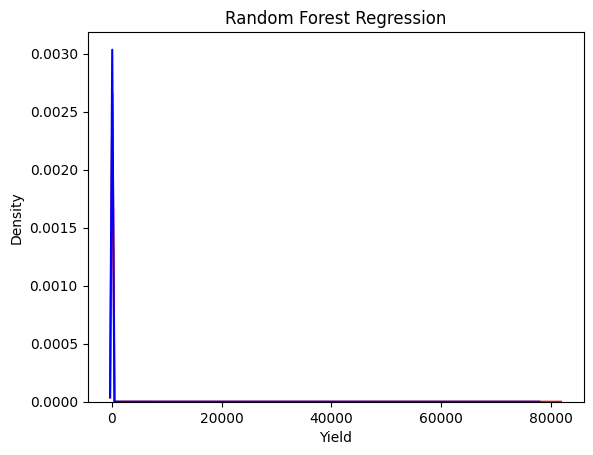

In [23]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RFyield.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

<b><h3> Linear Regression </b></h3>

In [25]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

array([-29.69194983,  -9.29168989, -69.96799569, ...,  -7.00403626,
       -37.48704529,   4.33145809])

In [27]:
model.score(x_test,y_test)

0.184334643961094

<b> Decision Tree </b>

In [28]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([0.47299197, 0.72413793, 2.97552131, ..., 0.7027027 , 0.73856209,
       1.        ])

In [29]:
regressor.score(x_test,y_test)

0.9748973981317075